# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

In [1]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.6/248.6 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 11.8 MB/s eta 0:00:00


**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [2]:
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR
import torchvision.models as models
from torchvision import transforms

In [4]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(77777)

In [5]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2023-11-18 13:58:07--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2023-11-18 13:58:07--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc638358f3b7532ccbd3f038caa4.dl.dropboxusercontent.com/cd/0/get/CHwxmADnO2aUQ13lrecZ0yaZkYviajQUMyCnHXIRjdYFyKEmDFrC3A7znAIWMEb7U9Anie7xZF6-oCeaN8bRNA01mpVB32rI4UIJHEQkvkr6kWYEbL_ApKa23VHHEECAQJ60KP6Dvi1cX-Abq9p63oRj/file?dl=1# [following]
--2023-11-18 13:58:07--  https://uc638358f3b7532ccbd3f038caa4.dl.dropboxusercontent.com/cd/0/get/CHwxmADnO2aUQ13lrecZ0yaZkYviajQUMyCnHXIRjdYFyKEmDFrC3A7znAIWMEb7U9Anie7xZF6-oCeaN8bRNA01mpVB32rI4UIJ

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [6]:
seed_everything(77777)

train_transform = transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),  # Случайное горизонтальное отражение
    torchvision.transforms.RandomRotation(10),  # Случайное вращение на 10 градусов
    torchvision.transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),  # Случайные изменения яркости, контраста, насыщенности и оттенка
    torchvision.transforms.ToTensor(),
])

val_transform = transforms.Compose([transforms.ToTensor()])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=128, num_workers=2, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=128, num_workers=2, shuffle=False)

# # Размер подмножества (30% от полного)
# subset_size = int(0.3 * len(train_dataset))
# subset_size_val = int(0.3 * len(val_dataset))

# # Создайте случайные индексы для подмножества
# indices = torch.randperm(len(train_dataset)).tolist()
# subset_indices = indices[:subset_size]

# indices_val = torch.randperm(len(val_dataset)).tolist()
# subset_indices_val = indices_val[:subset_size_val]

# # Веса для каждого элемента в наборе данных
# weights = [1.0 if i in subset_indices else 0.0 for i in range(len(train_dataset))]
# weights_val = [1.0 if i in subset_indices_val else 0.0 for i in range(len(val_dataset))]

# # Создайте WeightedRandomSampler
# sampler = WeightedRandomSampler(weights, num_samples=subset_size, replacement=False)
# sampler_val = WeightedRandomSampler(weights_val, num_samples=subset_size_val, replacement=False)

# # DataLoader с использованием WeightedRandomSampler
# train_dataloader = DataLoader(train_dataset, batch_size=128, num_workers = 2, sampler=sampler)
# val_dataloader = DataLoader(val_dataset, batch_size=128, num_workers = 2, sampler=sampler_val)

In [7]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

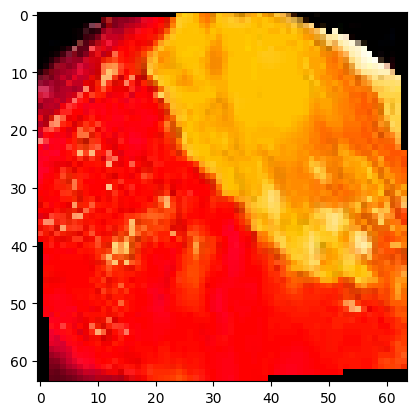

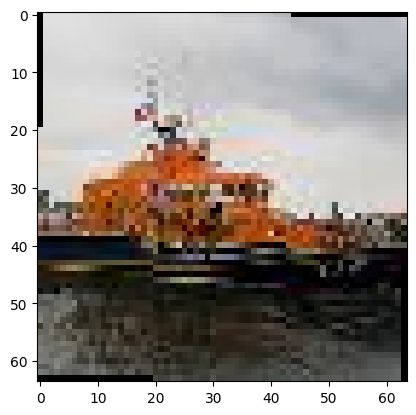

In [8]:
seed_everything(77777)
for batch in train_dataloader:
    images, class_nums = batch
    plt.imshow(images[3].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

### Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [ ]:
seed_everything(77777)

my_model = torchvision.models.densenet121(pretrained=False, num_classes=200)

class YourNet(torch.nn.Module): # функции и логгирование для wandb брал с семинара
    def __init__(self, my_model):
        super().__init__()
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()
        self.model = my_model

    def _forward(self, x):
        return self.model(x)

    def forward(self, images, target=None):
        output = self._forward(images)

        if target is not None:
            loss = self.loss_func(output, target)
            self.targets = torch.cat((self.targets, target.cpu()), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)
            self.accuracy = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=200)

        return loss if target is not None else output

    def get_accuracy(self, reset=False):
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accuracy

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


### Тренировочный класс lightning

In [ ]:
seed_everything(77777)
class YourModule(pl.LightningModule): # функции и логгирование для wandb брал с семинара

    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate


    def forward(self, x):
        return self.model(x)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        scheduler = StepLR(optimizer, step_size=3, gamma=0.1)  # про подбор параметров внизу написал. В кратце- перебирал руками
        return {"optimizer": optimizer, "lr_scheduler": scheduler}

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        loss = self.model(images, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        loss = self.model(images, target)
        self.log("val_loss", loss, prog_bar=True)

In [ ]:
seed_everything(77777)

wandb.finish() # окончание одного эксперемента. Отчасти из-за этого в wandb беда с названиями
wandb_logger = wandb_logger = WandbLogger(
    project='my_project_name',
    name='final_version',
    log_model='all')

device =  torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

learning_rate = 0.001 # тоже просто руками перебирал
model = YourNet(my_model)
module = YourModule(model, learning_rate)

In [ ]:
from pytorch_lightning.callbacks import LearningRateFinder


class FineTuneLearningRateFinder(LearningRateFinder):
    def __init__(self, milestones, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.milestones = milestones

    def on_fit_start(self, *args, **kwargs):
        return

    def on_train_epoch_start(self, trainer, pl_module):
        if trainer.current_epoch in self.milestones or trainer.current_epoch == 0:
            self.lr_find(trainer, pl_module)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, max_epochs=10, accelerator="cuda")  # не стал использовать подбор lr, потому что он выдавал невминяемые метрики
trainer.fit(module, train_dataloader, val_dataloader) #, callbacks=[FineTuneLearningRateFinder(milestones=(5, 10))])

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: Currently logged in as: vova-rodin. Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params
----------------------------------
0 | model | YourNet | 7.2 M 
----------------------------------
7.2 M     Trainable params
0         Non-trainable params
7.2 M     Total params
28.635    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


### Валидация результатов задания

In [ ]:
def evaluate_task(model, test_dataloader, device="cuda"):
    model = model.to(device)
    model.eval()
    accuracy = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            loss = model(images, labels)
            acc_batch = model.get_accuracy(reset=True)
        accuracy += acc_batch
    accuracy = accuracy / len(test_dataloader)
    return accuracy

In [ ]:
accuracy_task_one = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * accuracy_task_one / 0.44, 0, 10):.2f} баллов")
print(accuracy_task_one)

100%|██████████| 79/79 [00:06<00:00, 12.93it/s]

Оценка за это задание составит 9.42 баллов
tensor(0.4146)


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

In [ ]:
seed_everything(77777)

train_transform_second_task = transforms.Compose(
    [
        transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
        transforms.Resize((224, 224)),
        transforms.RandomVerticalFlip(), # Случайное вертикальное отражение
        transforms.RandomRotation(10),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # параметры нашел в интернете для модели выбранной (GPT предложил эти параметры)
    ])

val_transform_second_task = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

train_dataset_second_task = ImageFolder('dataset/dataset/train', transform=train_transform_second_task)
val_dataset_second_task = ImageFolder('dataset/dataset/val', transform=val_transform_second_task)

train_dataloader_second_task = DataLoader(train_dataset_second_task, batch_size=128, shuffle=True, num_workers=2)
val_dataloader_second_task = DataLoader(val_dataset_second_task, batch_size=128, shuffle=False, num_workers=2)

### Тренировочный класс lightning

In [ ]:
from torchvision.models import convnext_base

In [ ]:
class YourModule_second_task(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.model = convnext_base(pretrained = True) # предтренерованная модель
        self.model.classifier[2] = nn.Identity()
        self.classifier = nn.Linear(1024, 200) # делаю нужную мне размерность выхода
        self.optimizer = torch.optim.Adam(self.classifier.parameters())
        self.loss = nn.CrossEntropyLoss()
        self.model.requires_grad_(False)

    def configure_optimizers(self):
        return self.optimizer
        # schadular решил не брать, и без него долго учится. Хотя он скорее всего на скорость не влияет, но то что работает уже решил не трогать.

    def forward(self, x) -> torch.Tensor:
        with torch.no_grad():
            features = self.model(x)
        preds = self.classifier(features)
        return preds

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long(), num_classes=200, task='multiclass')
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)

In [ ]:
convnext_base(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Base_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Base_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/convnext_base-6075fbad.pth" to /root/.cache/torch/hub/checkpoints/convnext_base-6075fbad.pth
100%|██████████| 338M/338M [00:03<00:00, 95.4MB/s]


ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((128,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
          (1): Permute()
          (2): LayerNorm((128,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=128, out_features=512, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=512, out_features=128, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
          (1): Permute()
          (2): LayerNorm((128,), eps=1e-06, elementwise_affine=True)
          (3): Linear(

Посмотрим размерность слоя

In [ ]:
images, labels = next(iter(train_dataloader_second_task))

model_repr = convnext_base(pretrained = True)
model_repr.fc = nn.Identity()
with torch.no_grad():
  repr = model_repr(images)

repr.shape

torch.Size([128, 1000])

In [ ]:
seed_everything(77777)

wandb.finish()
wandb_logger = wandb_logger = WandbLogger(
    project='my_project_name',
    name='final_version_FINALLY',
    log_model='all')

device =  torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

module_second_task = YourModule_second_task()

epoch,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇████
train_loss,██▇▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▂▂▁▁▁▂▂▁▂▂▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_loss,█▅▃▂▁▁▁▁▁▁
epoch,9
train_loss,2.35447
trainer/global_step,7819
val_loss,2.44765


In [ ]:
trainer = pl.Trainer(logger=wandb_logger, max_epochs=3, accelerator="cuda")
trainer.fit(module_second_task, train_dataloader_second_task, val_dataloader_second_task)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type             | Params
------------------------------------------------
0 | model      | ConvNeXt         | 87.6 M
1 | classifier | Linear           | 205 K 
2 | loss       | CrossEntropyLoss | 0     
------------------------------------------------
205 K     Trainable params
87.6 M    Non-trainable params
87.8 M    Total params
351.086   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


### Валидация результатов задания

In [ ]:
def evaluate_task_second_task(module, test_dataloader, device="cuda"):
    module = module.to(device)
    m = module.model
    m.eval()
    accuracy_res = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            p = module.forward(images)
            acc = accuracy(torch.argmax(p, dim=-1).long(), labels.long(), task = 'multiclass', num_classes = 200)
        accuracy_res += acc
    accuracy_res = accuracy_res / len(test_dataloader)
    return accuracy_res.cpu()

In [ ]:
accuracy_second_task = evaluate_task_second_task(module_second_task, val_dataloader_second_task)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy_second_task - 0.5) / 0.34, 0, 10):.2f} баллов")
print(accuracy_second_task)

100%|██████████| 79/79 [01:49<00:00,  1.39s/it]

Оценка за это задание составит 10.00 баллов
tensor(0.8459)


# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

**Дисклеймер**.Это дз мне сьело все нервы :( Дальше я дам ссылки на отчеты по wandbe. В скобках после каждой ссылки будет количество экспериментов (в общей сложности 112). Я не удосужился ставить нормальные названия для каждого эксперимента, потому что после каждого второго эксперимента я тратил много времени, чтобы исправить какую-то ошибку. Поэтому я использовал wandb просто как динамический график для текущей модели.


1) https://wandb.ai/vova-rodin/my_project_name/reports/Untitled-Report--Vmlldzo2MDA4NTk2 (72)


2) https://wandb.ai/vova-rodin/task2/reports/Untitled-Report--Vmlldzo2MDA4NTg3 (35)


Кроме того, отмечу, что дальше я буду описывать процесс решения и буду говорить значения accuracy. Первоначальные обучения модели проводилась на 10-30-50% выборки (наиболее оптимальным по критерию репрезентативность-время оказалось 30%). В общем, я действовал из предположения, что смогу получить еще чуть лучше качество, когда обучу модель на всей выборке. Итоговые результаты сверху представлены уже для 100% выборки.

#Задание 1#

Я по ходу решения перебирал

1) модели: первые модели с семинаров (модель с прошлого ДЗ) давали
плохой результат (в районе 6 % точности). За тем большую часть экспериментов я проводил с resnet18 (добился точности в 26%) и resnet152 (точность около 18%).
Остановился на densenet121.

2) оптимизаторы: SGD с Schaduler работал лучше на resnet18. С resnet152 лучшую точность добился на SGD без Schaduler. densenet121 лучше работал с Adam + Schad.

3) Гиперпараметры. lr я побирался вручную и автоматически. Автоматически он подбирал почему-то слишком большие значения вроде 13. Вероятнее всего я просто не понял, как он работает. Поэтому перебирал вручную в диапазоне 0.01-4. Resnet18 работал с lr=0.1, gamma=0.1, steps=3. densenet121 тоже хорошо работает с этими параметрами, но lr=0.001.

#Задание 2#


Начал я с того, что в модель с 1 задания добавил аугментаций, попытался добавить резайсы и pretraind=True (~0.5-0.6 accuracy).

Вернулся к моделям resnet18, resnet152: val_loss стал улетать в 12-38, что точно не могло мне обеспечить нормальный accuracy. Причем модель стала переобучаться уже на первых эпохах.

Начал искать более эффективные модели. efficientnet показывал метрики еще ниже чем resnet'ы, так еще и на память жаловался. Уменьшив количество батчей, я получил модель, в которой каждая эпоха длится приблизительно 3 часа (а я все еще работаю только на 30%) при общем качестве обучения не сильно выше resnet (я не дождался обучения модели до конца, я смотрел на val_loss график в wandb).


По итогу я остановился на convnext_base. Время обучения было +- 20 мин на эпоху. Лучший результат был с оптимизатором Adam без schadular. Возможно, я смог бы добиться лучшего результата если бы нашел параметры для schadular, но без него работает достаточно хорошо.